In [1]:
print("SageMath:{}".format(version()))

SageMath:SageMath version 9.0, Release Date: 2020-01-01


In [2]:
print("Python version:{}".format(sys.version))

Python version:3.7.3 (default, Jan  2 2020, 21:01:11) 
[GCC 9.2.0]


# Appolonian Circles

Infinity
cot(1/9*pi)
cot(2/9*pi)
1/3*sqrt(3)
cot(4/9*pi)
-cot(4/9*pi)
-1/3*sqrt(3)
-cot(2/9*pi)
-cot(1/9*pi)


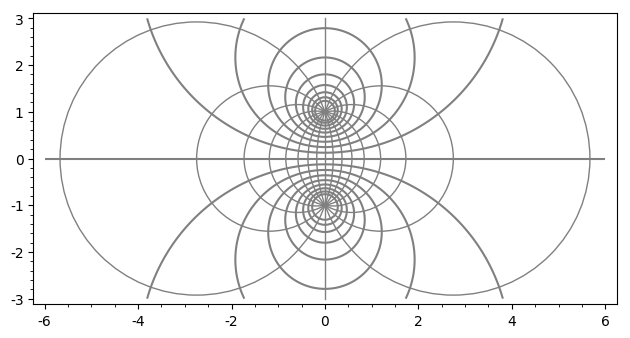

In [3]:
var("x y")

focus1 = vector([0,1])
focus2 = vector([0,-1])

p = 9
angles = [i * pi/p for i in range(p)]

G = Graphics()

G += point2d(focus1)
G += point2d(focus2)

y_min = -3
y_max = 3
x_min = -6
x_max = 6
color = 'grey'
for angle in angles:
    cotangent = cot(angle)
    print(cotangent)
    if cotangent.is_infinity():
        G += line2d([[0, y_min], [0,y_max]], color=color)
    else:
        G += circle(center=[cotangent,0],radius=sqrt(cotangent^2 + 1), color=color)
        
k_range = [0.5 * i for i in range(-9, 9)]
for k in k_range:
    G += implicit_plot(x^2 + (y -1)^2 == e^k*(x^2 +(y+1)^2),[x, x_min, x_max], [y, y_min,y_max],color=color)
    
G.show()

In [4]:
from typing import List

var("x y")

class Line:
    def __init__(self, orthonormal: List[float], d: float):
        self.v = orthonormal
        self.d = d
        self._insideout = False
        
    def flip_insideout(self) -> None:
        self._insideout = not self._insideout    
    
    def get_alg_eq(self):
        if self._insideout:
            return -(self.v[0] * x + self.v[1] * y - self.d)
        else:
            return self.v[0] * x + self.v[1] * y - self.d

class Circle:
    def __init__(self, centre, radius, insideout=False):
        self.c = centre
        self.r = radius
        self._insideout = insideout
    
    def is_isideout(self):
        return self._insideout
    
    def flip_insideout(self):
        self._insideout = not self._insideout
        
    def is_point(self):
        return self.r == 0
    
    def get_alg_eq(self):
        if self._insideout:
            return -((x - self.c[0])^2 + (y - self.c[1])^2 - self.r^2)
        else:
            return (x - self.c[0])^2 + (y - self.c[1])^2 - self.r^2
    
class AppolonianCircle:
    def __init__(self, focus1, focus2, ratio):
        self.f1 = focus1
        self.f2 = focus2
        self.r = ratio
    
    def is_point(self):
        return self.r == 0 or self.r is Infinity
        
    def get_alg_eq(self):
        if self.r == 0:
            return (x - self.f1[0])^2 + (y - self.f1[1])^2
        elif self.r is Infinity:
            return (x -self.f2[0])^2 +(y -self.f2[1])^2
        else:
            return (x - self.f1[0])^2 + (y - self.f1[1])^2 - self.r * ((x -self.f2[0])^2 +(y -self.f2[1])^2)

In [5]:
from itertools import product

def get_center_x_coord(tangent_angle):
    """It is assumed that foci are at (0,1) and (0,-1). TO-DO: generalize to arbitrary foci"""
    if tangent_angle < 0 or pi < tangent_angle:
        raise Exception("tangent angle a at focus must be between 0 <= a <= pi. Given value: {}".format(tangent_angle))
    if tangent_angle == 0:
        return +Infinity
    elif tangent_angle == pi:
        return -Infinity
    else:
        return cot(tangent_angle)

def test_exceptions(values):
    for value in values:
        try:
            res = get_center_x_coord(value)
        except Exception as e:
            print(e)
        else:
            print(res)
            
test_exceptions([-1, 2*pi,0, pi])
print(get_center_x_coord(0) > 0)
print(get_center_x_coord(pi) > 0)


def get_verti_bound(centre_x):
    if centre_x is +Infinity:
        return Line([-1,0], 0)
    elif centre_x is -Infinity:
        return Line([1,0], 0)
    else:
        centre_x = float(centre_x)
        return Circle([centre_x, 0], sqrt(centre_x^2 + 1))


def mod_(x, p):
    if 0<= x and x <= p:
        return x
    elif x < 0:
        return mod_(x + p, p)
    else:
        return mod_(x - p, p)
    

def get_col_key(num):
    return num % 2


def get_vertical_bounded_regions(angle_list):
    verti_boundaries = []
    verti_region_grids = []
    for i, (lower_angle, upper_angle) in enumerate(angle_list):
        lower_centre_x = get_center_x_coord(lower_angle)
        lower_boundary = get_verti_bound(lower_centre_x)
        verti_boundaries.append(lower_boundary)
        upper_centre_x = get_center_x_coord(upper_angle)
        upper_boundary = get_verti_bound(upper_centre_x)
        if isinstance(lower_boundary, Circle) and isinstance(upper_boundary, Circle):
            if upper_boundary.c[0] > lower_boundary.c[0]:
                upper_boundary.flip_insideout()
        if isinstance(lower_boundary, Line) and isinstance(upper_boundary, Circle):
            if lower_boundary.v[0] > 0:
                lower_boundary.flip_insideout()
        verti_region_grids.append([(lower_boundary, upper_boundary), get_col_key(i)])
    return verti_boundaries, verti_region_grids
    
def get_horizontal_bounded_regions(ratio_list, focus_list):
    focus1, focus2 = focus_list
    horiz_boundaries = []
    horiz_region_grids = []
    for i, (lower_ratio, upper_ratio) in enumerate(ratio_list):
        lower_boundary = AppolonianCircle(focus1,focus2, lower_ratio)
        horiz_boundaries.append(lower_boundary)
        upper_boundary = AppolonianCircle(focus1,focus2, upper_ratio)
        horiz_region_grids.append([(lower_boundary, upper_boundary), get_col_key(i)])
    return horiz_boundaries, horiz_region_grids

tangent angle a at focus must be between 0 <= a <= pi. Given value: -1
tangent angle a at focus must be between 0 <= a <= pi. Given value: 2*pi
+Infinity
-Infinity
True
False


In [2]:
+Infinity == -Infinity

False

In [6]:
var("x y")

def get_angle_grids(angle_increment=0,
                    p=6):
    return [( mod_(i * pi/p + angle_increment, pi), mod_((i + 1) * pi/p + angle_increment, pi)) for i in range(p)]
    

def get_ratio_grids():
    k_range = [e^(0.5 * i) for i in range(-4, 5)]
    k_range = [0] + k_range + [Infinity]
    ratio_grids = []
    for i in range(len(k_range) - 1):
        ratio_grids.append((k_range[i], k_range[i+1]))
    return ratio_grids
    
    
def make_checkerbord(angle_grids,
                     ratio_grids,
                     focus_list,
                     col_dict = {0:'yellow', 1:'lawngreen'}):    
    #print(angle_grids)
    verti_boundaries, verti_region_grids = get_vertical_bounded_regions(angle_grids)
    #print(verti_region_grids)        

    #print(ratio_grids)
    horiz_boundaries, horiz_region_grids = get_horizontal_bounded_regions(ratio_grids, focus_list)
    #print(horiz_region_grids)        
    boundaries = verti_boundaries + horiz_boundaries

    region_list = []
    for (horiz_region_bound, i), (verti_region_bound, j) in product(horiz_region_grids, verti_region_grids):
        if horiz_region_bound[1].is_point():
            region0 = [horiz_region_bound[0].get_alg_eq() > 0]
        else:
            region0 = [horiz_region_bound[0].get_alg_eq() > 0, horiz_region_bound[1].get_alg_eq() < 0]
        # Plots two regions of symmetric difference of the two boundary circles: (not C_1 \cap C_2) \cup (C_1 and \cap C_2)
        region1 = [verti_region_bound[0].get_alg_eq() < 0, verti_region_bound[1].get_alg_eq() > 0]
        region2 = [verti_region_bound[0].get_alg_eq() > 0, verti_region_bound[1].get_alg_eq() < 0]
        col_key = get_col_key(i + j)
        incol = col_dict[col_key]
        region_list.extend([(region1 + region0, incol), (region2 + region0, incol)])        
    return region_list, boundaries



In [7]:
def render_objects(region_list, boundaries,
                   x_range, y_range,
                   point_list=None,
                   plot_points = 200,
                   bound_col = 'black'):
    x_min, x_max = x_range
    y_min, y_max = y_range
    G = Graphics()
    if len(point_list) > 0:
        for point in point_list:
            G += point2d(point)

    for region, incol in region_list:
        G += region_plot(region,[x, x_min, x_max],[y, y_min,y_max], incol=incol, plot_points=plot_points)

    for boundary in boundaries:
        region_eq = boundary.get_alg_eq()
        G += implicit_plot(region_eq == 0,[x, x_min, x_max], [y, y_min,y_max], color=bound_col, frame=False)
    return G


/home/hisanobu_nakamura/SageMath/local/lib/python3.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


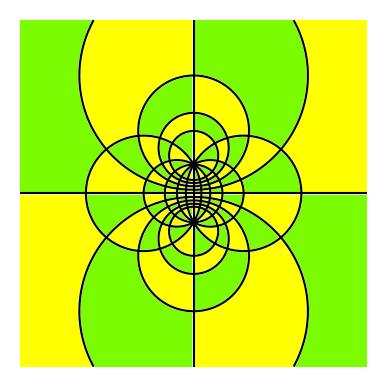

In [11]:
focus1 = [0,1]
focus2 = [0,-1]
focus_list = [focus1, focus2]

y_range = (-6, 6)
x_range = (-6, 6)

p = 6

#col_dict = {0:'white', 1:'grey'}

angle_grids = get_angle_grids(angle_increment=0,p=6)
ratio_grids = get_ratio_grids()
region_list, boundaries = make_checkerbord(angle_grids, ratio_grids, focus_list)
plot_points=200
graph = render_objects(region_list, boundaries,
                       x_range, y_range,
                       point_list=focus_list, plot_points=plot_points)
graph

/home/hisanobu_nakamura/SageMath/local/lib/python3.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Animation with 40 frames
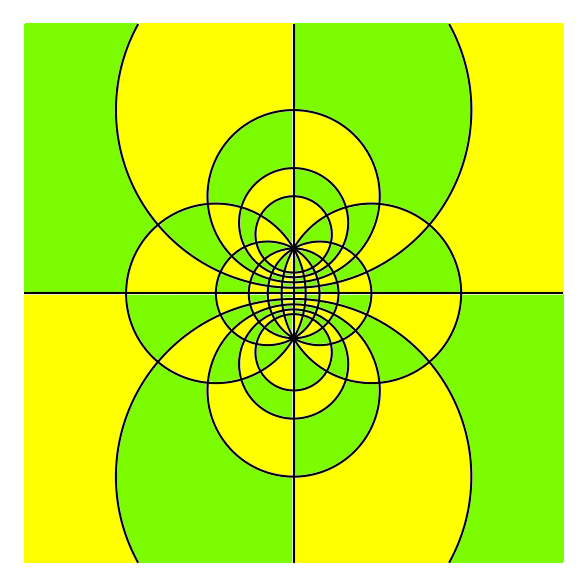

In [22]:
from multiprocessing import Pool


y_range = (-6, 6)
x_range = (-6, 6)
focus1 = [0,1]
focus2 = [0,-1]
focus_list = [focus1, focus2]
p = 6
plot_points = 200

def incremented_graph(increment: float):
    angle_grids = get_angle_grids(angle_increment=increment,p=p)
    ratio_grids = get_ratio_grids()
    region_list, boundaries = make_checkerbord(angle_grids, ratio_grids, focus_list)
    return render_objects(region_list, boundaries,
                           x_range, y_range,
                           point_list=focus_list, plot_points=plot_points)

n = 40

param_list = [i/n * pi/3 for i in range(n)]

with Pool() as pool:
    frames = pool.map(incremented_graph, param_list)
    
# G.show(ticks=[[],[]])
a = animate(frames, xmin=x_range[0], xmax=x_range[1], ymin=y_range[0], ymax=y_range[1],figsize=[6,6])
a.show()

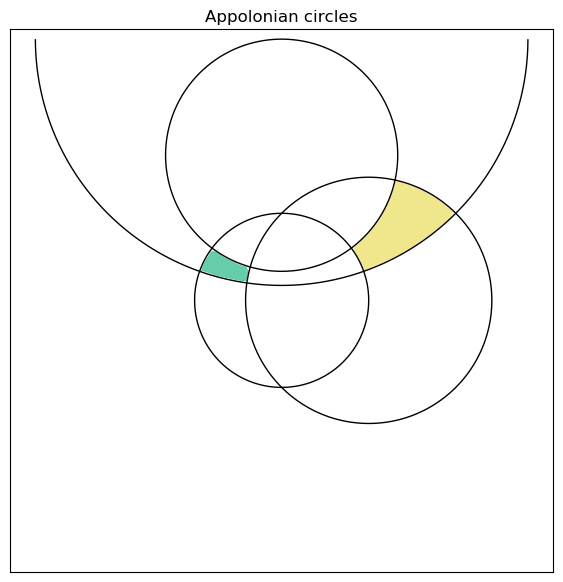

In [351]:
var("x y")

def get_alg_eq_circle(centre, radius):
    return (x - centre[0])^2 + (y - centre[1])^2 - radius^2

def get_alg_eq_appolonian(focus1, focus2, ratio):
    return (x - focus1[0])^2 + (y - focus1[1])^2 - ratio * ((x -focus2[0])^2 +(y -focus2[1])^2)

circle1 = get_alg_eq_circle([1,0], sqrt(2))
circle2 = get_alg_eq_circle([0,0], 1)
circle3 = get_alg_eq_appolonian([0,1], [0,-1],0.5)
circle4 = get_alg_eq_appolonian([0,1], [0,-1],0.25)

G = Graphics()


# incol = hue(0.5)
incol = 'mediumaquamarine'
#region1 = (0 > circle1,circle2 > 0)
region1 = [circle1 < 0, circle2 > 0] + [circle3 < 0, circle4 >0]
region2 = [circle1 > 0, circle2 < 0] + [circle3 < 0, circle4 >0]
G += region_plot(region1,[x,-3,3],[y,-3,3], incol='khaki') + region_plot(region2,[x,-3,3],[y,-3,3], incol=incol)
circles = [circle1, circle2, circle3, circle4]
for circ in circles:
    G += implicit_plot(circ==0,(x,-3,3),(y,-3,3), color='black')

G.show(ticks=[[],[]], title="Appolonian circles")

[-1, 0]


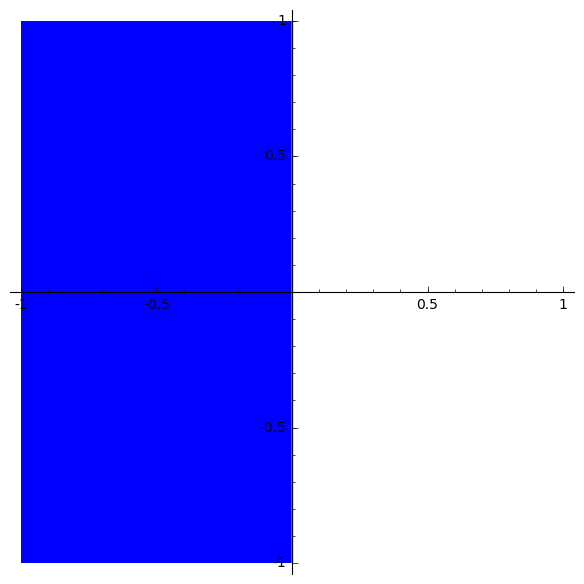

In [15]:
l = Line([-1,0],0)
print(l.v)
region_plot(l.get_alg_eq() > 0, [x,-1,1], [y,-1,1])


In [29]:
p = 6
angle_grids = [(i * pi/p, (i + 1) * pi/p) for i in range(p)]
center_x_list = (map(lambda (a1, a2): (cot(a1), cot(a2)),angle_grids))
print(center_x_list)

center_x_list[0][0]

[(Infinity, sqrt(3)), (sqrt(3), 1/3*sqrt(3)), (1/3*sqrt(3), 0), (0, -1/3*sqrt(3)), (-1/3*sqrt(3), -sqrt(3)), (-sqrt(3), Infinity)]


Infinity

# Hyperbolic Moebius Transformation
## Relating to $z \mapsto e^{\lambda}z$ to the transformation on $S^2$
Stereographic projection from $S^2 := \left\{ (X,Y,Z) \in \mathbb{R}^3 \mid X^2 +Y^2 +Z^2=1\right\}$ to the extended complex plane $\widehat{\mathbb{C}} = \mathbb{C} \cup \{\infty\}$
\begin{eqnarray}
\pi &:& S^2 \rightarrow \widehat{\mathbb{C}} \\
\pi &:& (X, Y, Z) \mapsto \frac{X}{1-Z} +i\frac{Y}{1-Z}
\end{eqnarray}
The inverse tranformation
\begin{eqnarray}
\pi^{-1} &:& \widehat{\mathbb{C}} \rightarrow S^2 \\
\pi^{-1} &:& z = x + iy \mapsto \left( \frac{2x}{R^2 +1}, \frac{2y}{R^2 +1}, \frac{R^2 -1}{R^2 +1} \right), \quad where \quad R^2 = x^2 +y^2
\end{eqnarray}
We can see the effect of the Moebius transformation $\phi_k: z \mapsto kz, \; k\ne0$.
The origin $0\in \mathbb{C}$ maps to itself $\phi_k(0) = 0$ so it is a fixed point of $\phi_k$.
Notice $0\in \mathbb{C}$ maps to the south pole $ \pi^{-1}(0) = (0,0,-1) \in S^2$ and the other fixed point is $\infty$ mapping to $\pi^{-1}(\infty) = (0,0,1)$.
Now let us consider $z \ne 0, \infty$. It can be written as $z = e^{\rho + i\varphi}=e^{\rho}(\cos{\varphi}+i\sin{\varphi})$.
Then the image under $\pi^{-1}$ becomes
\begin{equation}
\pi^{-1}(z) = \left( \frac{\cos{\varphi}}{\cosh{\rho}}, \frac{\sin{\varphi}}{\cosh{\rho}}, \tanh{\rho} \right)
\end{equation}
From this formula, we relate the lattitude parameter $\theta$ of the $\pi^{-1}(z)=\left(\sin{\theta}\cos{\varphi},\sin{\theta} \sin{\varphi}, \cos{\theta} \right)$ to $\rho$.
\begin{equation}
\theta = \cos^{-1}{\tanh{\rho}}
\end{equation}
Writing the Moebius transformation $\phi_k: z \mapsto kz, \; k\ne0$ as $\phi_{\lambda}: z \mapsto e^{\lambda}z, \; k = e^{\lambda}$,
we can see the effect of $\phi_{\lambda}$ on $z$ reflected in $\pi^{-1}$(z).
\begin{equation}
\pi^{-1}(\phi_{\lambda}(z)) = \left( \frac{\cos{\varphi}}{\cosh{(\rho + \lambda)}}, \frac{\sin{\varphi}}{\cosh{(\rho+\lambda)}}, \tanh{(\rho+\lambda)} \right)
\end{equation}